In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
from time import time
import pickle
import statsmodels.api as sm
from sklearn.linear_model import TheilSenRegressor
import pymannkendall as mk
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

path_ = '/home/mizu_home/xp53/nas/BEST/TAVG/'
pre_ = 'Complete_TAVG_Daily_LatLong1_'

from ipcc_colormap import *
cmap_prep = ipcc_cmap()
cmap_prep.read_rgb_data_from_excel()
;

''

In [2]:
# read processed data from pkl file
pkl_file = open('NH_winter_temp_anom.pkl', 'rb')
# remove the first 90 rows (JFM of 1980) and the last 61 rows (ND of 2020)
temp = pickle.load(pkl_file)

# recover the original values by adding the climatology
with xr.open_dataset(path_ + pre_ + '1980.nc') as ds:
    climatology = ds.climatology.values[:,-90:,:]

doy_l = [0, 31, 59, 304, 334]
doy_r = [31, 59, 90, 334, 365]
ll = [0, 31, 59, 90, 120, 151]
for yy in range(40):
    for mm in range(5):
        il, ir = 151*yy + ll[mm], 151*yy + ll[mm+1]
        temp[il:ir,:,:] += climatology[doy_l[mm]:doy_r[mm],:,:]

temp = temp[90:-61,:,:]
climatology_ = np.mean(temp, axis=0)
mask = 1 - np.isnan(np.mean(temp, axis=0))
mask2 = np.loadtxt('mask_1deg.txt')
mask = mask * mask2

In [5]:
swe_gridded = np.loadtxt('swe_gridded_1deg.txt')
swe_insitu = np.loadtxt('swe_insitu_1deg.txt')

cc_gridded = []
cc_insitu = []
thres_ls = np.arange(-20, 11, 2)
xx = np.arange(39)

for thres in thres_ls:
    t1 = time()
    days_below_thres = np.zeros((39, 90, 360))
    comp_gridded = []
    comp_insitu = []
    for yy in range(39):
        left, right = yy*151, (yy+1)*151
        days_below_thres[yy,:,:] = np.sum((temp[left:right,:,:]<thres), axis=0)
    
    for i in range(90):
        for j in range(360):
            if not mask[i, j]: continue
            if swe_gridded[i,j] > 4: continue
            
            lm = TheilSenRegressor(random_state=42)
            lm.fit(xx[:,None], days_below_thres[:,i,j])
            
            comp_gridded.append((lm.coef_[0]*10, swe_gridded[i,j]))
            if swe_insitu[i,j] != 0:
                comp_insitu.append((lm.coef_[0]*10, swe_insitu[i,j]))
    comp_gridded = np.array(comp_gridded)
    comp_insitu = np.array(comp_insitu)
    cc_gridded.append(np.corrcoef([comp_gridded[:,0], comp_gridded[:,1]])[0,1])
    cc_insitu.append(np.corrcoef([comp_insitu[:,0], comp_insitu[:,1]])[0,1])
    print('thres =', thres, 'time lapsed =', time()-t1)
    

thres = -20 time lapsed = 66.46058320999146
thres = -18 time lapsed = 66.84832859039307
thres = -16 time lapsed = 66.96960878372192
thres = -14 time lapsed = 69.29539060592651
thres = -12 time lapsed = 69.6548364162445
thres = -10 time lapsed = 70.19659566879272
thres = -8 time lapsed = 69.04242968559265
thres = -6 time lapsed = 68.77132225036621
thres = -4 time lapsed = 65.25405597686768
thres = -2 time lapsed = 62.65156126022339
thres = 0 time lapsed = 60.362534523010254
thres = 2 time lapsed = 58.01455760002136
thres = 4 time lapsed = 54.80367827415466
thres = 6 time lapsed = 52.21167755126953
thres = 8 time lapsed = 49.50090765953064
thres = 10 time lapsed = 47.184378147125244


Text(0, 0.5, 'Correlation between trend patterns')

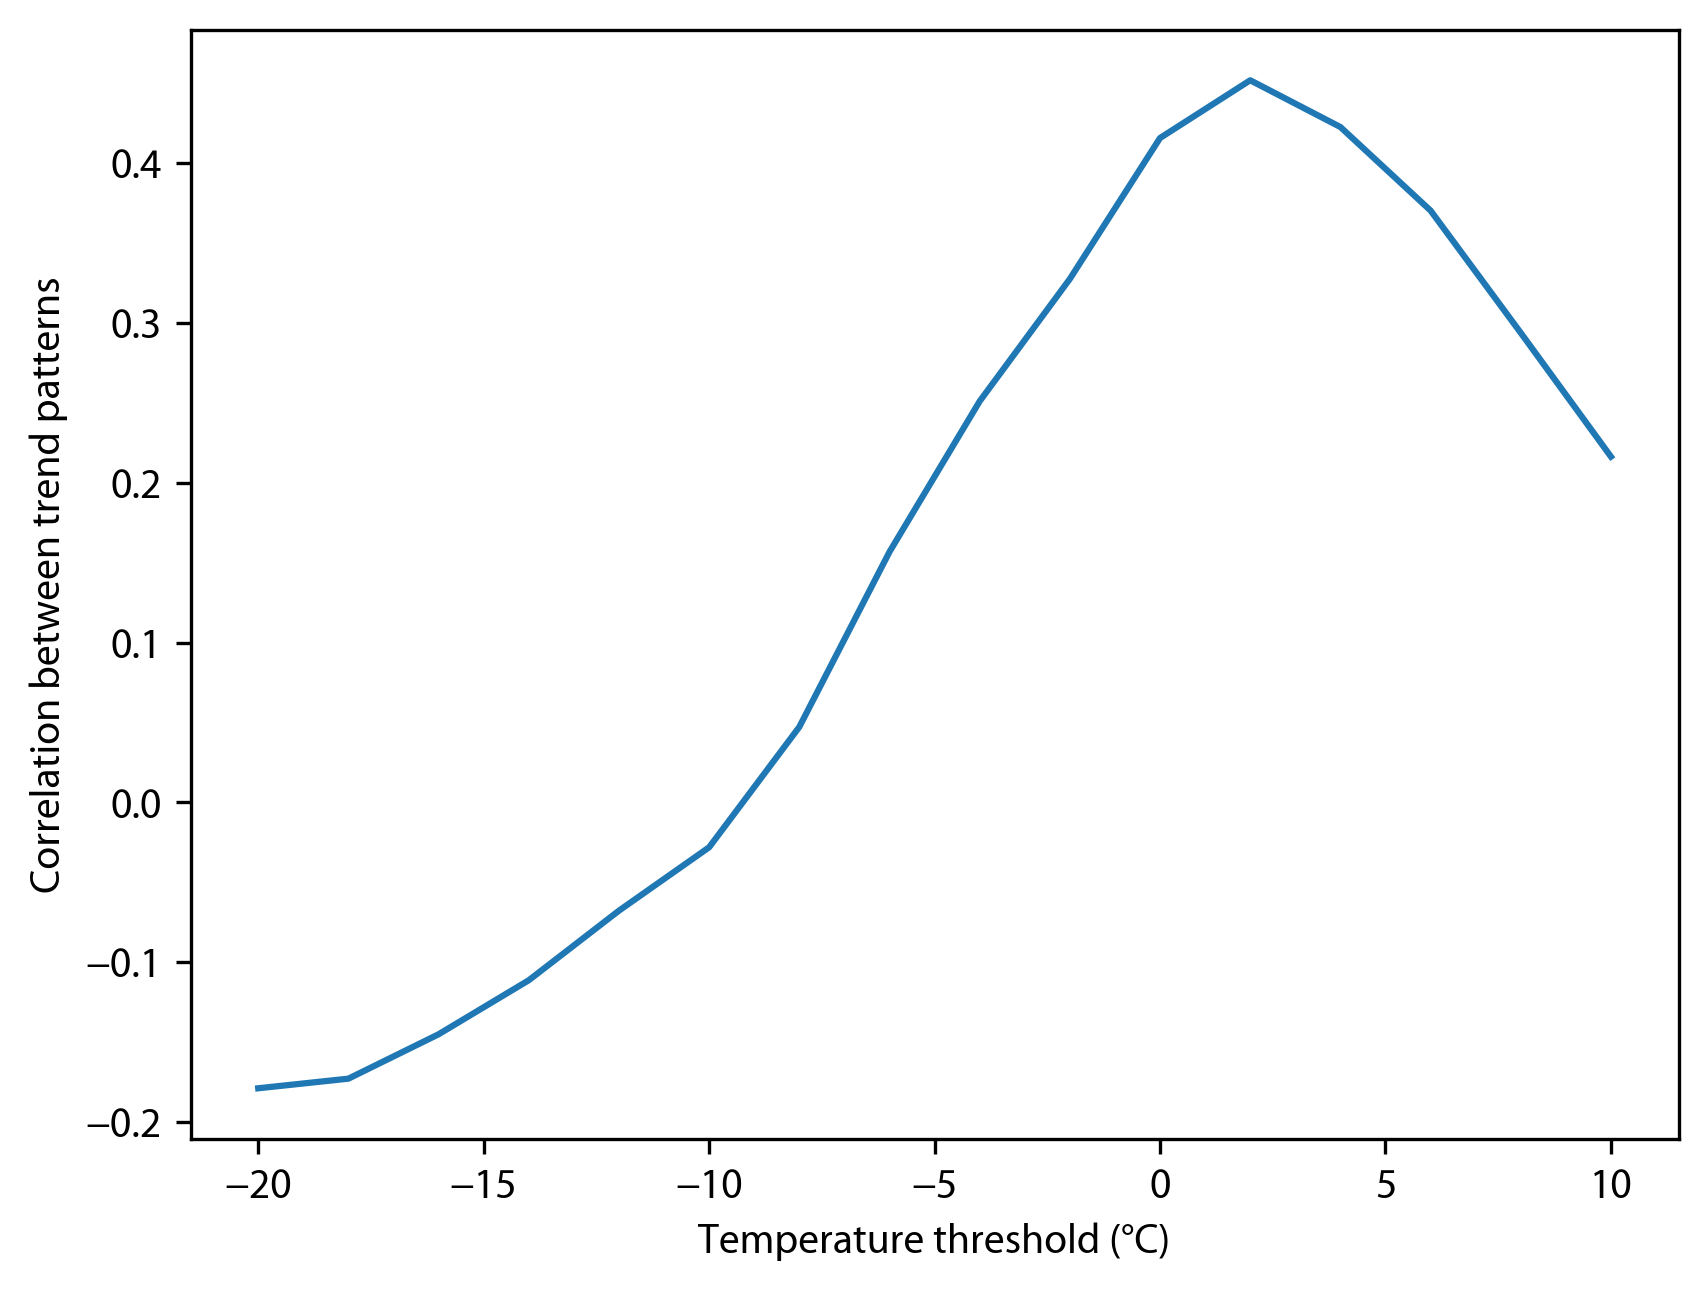

In [8]:
plt.plot(thres_ls, cc_gridded, label='Gridded')
plt.xlabel('Temperature threshold (°C)')
plt.ylabel('Correlation between trend patterns')

In [ ]:
# read processed data from pkl file
pkl_file = open('NH_winter_temp_anom.pkl', 'rb')
# remove the first 90 rows (JFM of 1980) and the last 61 rows (ND of 2020)
temp = pickle.load(pkl_file)

# recover the original values by adding the climatology
with xr.open_dataset(path_ + pre_ + '1980.nc') as ds:
    climatology = ds.climatology.values[:,-90:,:]

doy_l = [0, 31, 59, 304, 334]
doy_r = [31, 59, 90, 334, 365]
ll = [0, 31, 59, 90, 120, 151]
for yy in range(40):
    for mm in range(5):
        il, ir = 151*yy + ll[mm], 151*yy + ll[mm+1]
        temp[il:ir,:,:] += climatology[doy_l[mm]:doy_r[mm],:,:]

temp = temp[90:-61,:,:]
climatology_ = np.mean(temp, axis=0)
mask = 1 - np.isnan(np.mean(temp, axis=0))
mask2 = np.loadtxt('mask_1deg.txt')
mask = mask * mask2

In [ ]:
swe_gridded = np.loadtxt('swe_gridded_1deg.txt')
swe_insitu = np.loadtxt('swe_insitu_1deg.txt')

cc_gridded = []
cc_insitu = []